The purpose of this code is to analyze cantilever deflection data collected using the FemtoTools from Draper. The cantilever was a 220um silica fiber optic cable from Thorlabs, stripped, and tested at various lengths.

Author: Maya Winters Faaborg

In [1]:
%matplotlib inline 

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import pandas as pd
import seaborn as sns

In [3]:
#import data
from numpy import genfromtxt
mm30 = genfromtxt('30mm_cleaned.csv', delimiter=',')
mm70 = genfromtxt('70mm_cleaned.csv', delimiter=',')
mm81 = genfromtxt('81mm_cleaned.csv', delimiter=',')

Text(0.5, 1.0, 'Force vs Displacement')

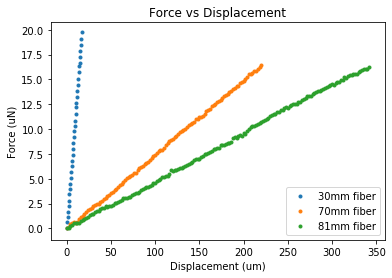

In [4]:
#plot them with starting displacements and forces subtracted off so that they all start at 0,0
plt.scatter(mm30[:,0]-mm30[1,0],mm30[:,1]-mm30[1,1], marker='.', label='30mm fiber')
plt.scatter(mm70[:,0]-mm70[1,0],mm70[:,1]-mm70[1,1], marker='.', label='70mm fiber')
plt.scatter(mm81[:,0]-mm81[1,0],mm81[:,1]-mm81[1,1], marker='.', label='81mm fiber')
plt.legend(loc=4)
plt.xlabel('Displacement (um)')
plt.ylabel('Force (uN)')
plt.title('Force vs Displacement')

# Model

Deflection of an end-loaded cantilever:

$\delta = \frac{F L^3}{3 E I}$

Where F is the force, L is the length, E is the Young's Modulus, and I is the second moment of area. For a circle, the second moment of area is $\frac{\pi r^4}{4}$. So, given a fixed E and radius of cantilever, our expected deflection as a function of force and length is:

$$\delta = \frac{4 F L^3}{3 \pi E r^4} \propto F L^3$$

Finally, we can solve for Force if we choose, and define a bending stiffness:

$$ F = k \delta = \left( \frac{3 \pi E r^4}{4 L^3} \right) \delta$$

Next, let's see if our data supports the $L^3$ dependancy. If we rescale by $L^3$, we should find a length-independant k value that is the same for all 3 cantilevers.

Text(0.5, 1.0, 'Re-Scaled Force vs Displacement')

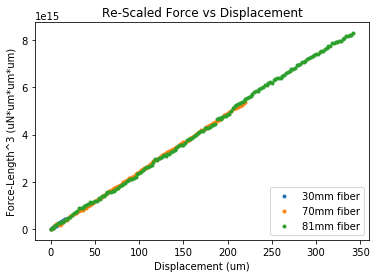

In [5]:
#rescaled plots
plt.scatter(mm30[:,0]-mm30[1,0],(mm30[:,1]-mm30[1,1])*(28*10**3)**3, marker='.', label='30mm fiber')
plt.scatter(mm70[:,0]-mm70[1,0],(mm70[:,1]-mm70[1,1])*(69*10**3)**3, marker='.', label='70mm fiber')
plt.scatter(mm81[:,0]-mm81[1,0],(mm81[:,1]-mm81[1,1])*(80*10**3)**3, marker='.', label='81mm fiber')
plt.legend(loc=4)
plt.xlabel('Displacement (um)')
plt.ylabel('Force-Length^3 (uN*um*um*um)')
plt.title('Re-Scaled Force vs Displacement')